# [Introduction to Time Series in Python](https://www.youtube.com/watch?v=82KDKJflUJ4&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO&index=3)

### Import the packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#sns.set()

### Importing the data
[Index2018.csv](https://www.kaggle.com/regaipkurt/financial-markets)

In [2]:
raw_data =pd.read_csv("Music/Index2018.csv")

In [3]:
df=raw_data.copy()

### Examining the data

In [4]:
df.head(5)

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting the data

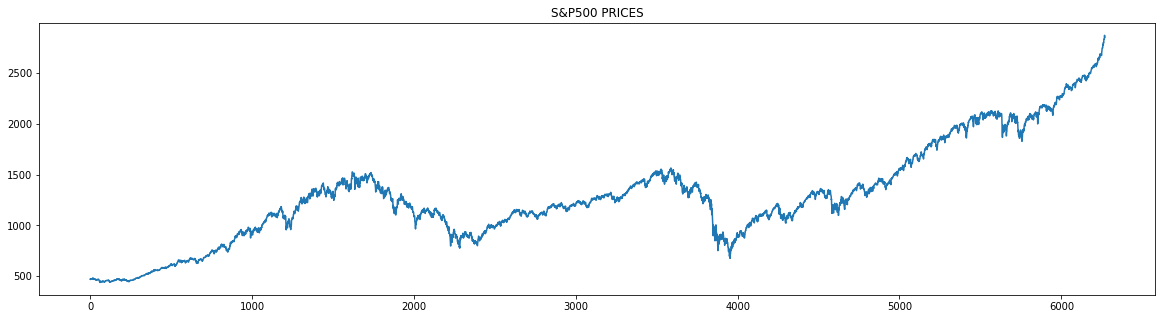

In [7]:
df.spx.plot(figsize=(20,5), title="S&P500 PRICES")

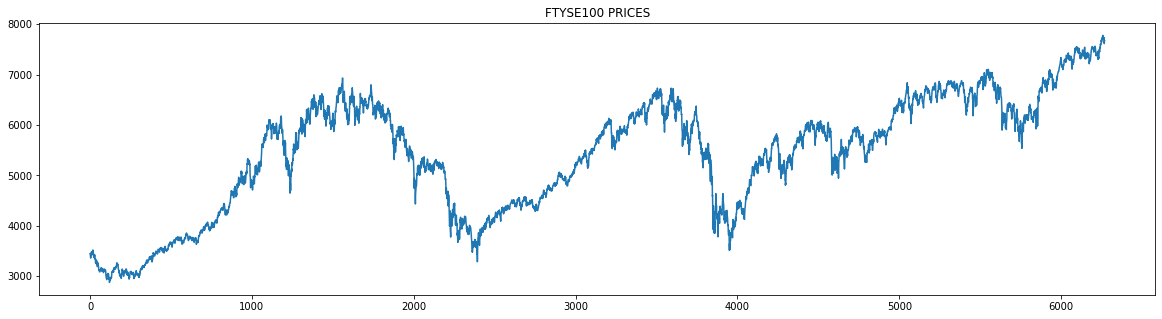

In [8]:
df.ftse.plot(figsize=(20,5), title="FTYSE100 PRICES")

Text(0.5, 1.0, 'S&P500 VS FTSE100')

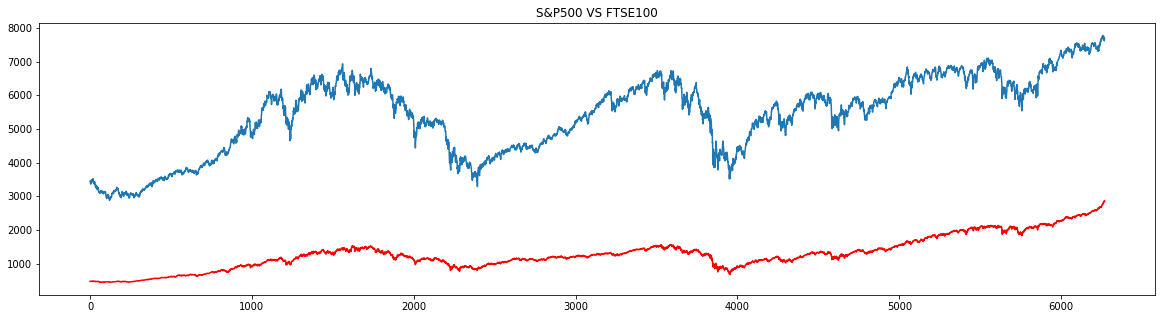

In [9]:
df.spx.plot(figsize=(20,5), color='r')
df.ftse.plot(figsize=(20,5))
plt.title("S&P500 VS FTSE100")

### [The QQ plot](https://www.youtube.com/watch?v=okjYjClSjOg)

In [10]:
import scipy.stats
import pylab

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.460561028412, 1288.1275420815123, 0.9767273150948816))

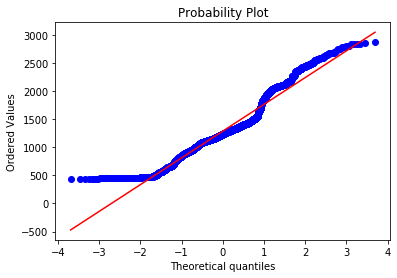

In [11]:
scipy.stats.probplot(df.spx, plot=pylab)

#  [ Creating a Time Series Object in Python](https://www.youtube.com/watch?v=DQbBC0ky82s&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO&index=4)

### From text to date

In [12]:
df.date=pd.to_datetime(df.date, dayfirst=True)

In [13]:
df.head(5)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
df.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting index

In [15]:
df.set_index('date', inplace=True)

In [16]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [17]:
#for frquency as daily manner we use 'd'
df=df.asfreq('d')
df.head(5)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [18]:
# for business day we use 'b'
df=df.asfreq('b')
df.head(5)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling missing values

In [19]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [20]:
#forward fill
df.spx=df.spx.fillna(method="ffill")
#backward fill
df.ftse=df.ftse.fillna(method="bfill")
#average fill
df.dax=df.dax.fillna(value=df.dax.mean())
df.nikkei=df.nikkei.fillna(value=df.nikkei.mean())

In [21]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying the dataset

In [22]:
df['market_value']=df.spx
df.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [23]:
del df['spx'], df['dax'], df['nikkei']

In [24]:
df.describe()

,ftse,market_value
count,6277.000000,6277.000000
mean,5423.690398,1288.642547
std,1145.568370,487.868210
min,2876.600000,438.920000
25%,4487.880000,992.715221
50%,5663.300000,1233.761241
75%,6304.630175,1460.250000
max,7778.637689,2872.867839


In [25]:
del df['ftse']
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [26]:
df.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting the data

In [27]:
size=int(len(df)*0.8)
#we have takeing training data upto 80 percent
df_tra=df.iloc[:size]
# we have taking bottom 20 percent as testing data
df_tes=df.iloc[size:]

In [28]:
df_tra.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [29]:
#there is no overlapping between traing data and testing data
df_tes.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


# [Working with Time Series in Python](https://www.youtube.com/watch?v=l_EDA7rDH3s&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO&index=5)

### [White noise](https://www.youtube.com/watch?v=cr4zIXAmSRI&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=3)

[Lag Operator](https://www.youtube.com/watch?v=VPNijQ2L3XM&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=4)

In [30]:
wn =np.random.normal(loc=df.mean(), scale=df.std(), size=len(df))

In [31]:
df['white_noise']=wn
df.describe()

,market_value,white_noise
count,6277.000000,6277.000000
mean,1288.642547,1284.503394
std,487.868210,490.401100
min,438.920000,-303.031641
25%,992.715221,957.102879
50%,1233.761241,1287.986024
75%,1460.250000,1618.038405
max,2872.867839,3001.629410


Text(0.5, 1.0, 'Time series white noise')

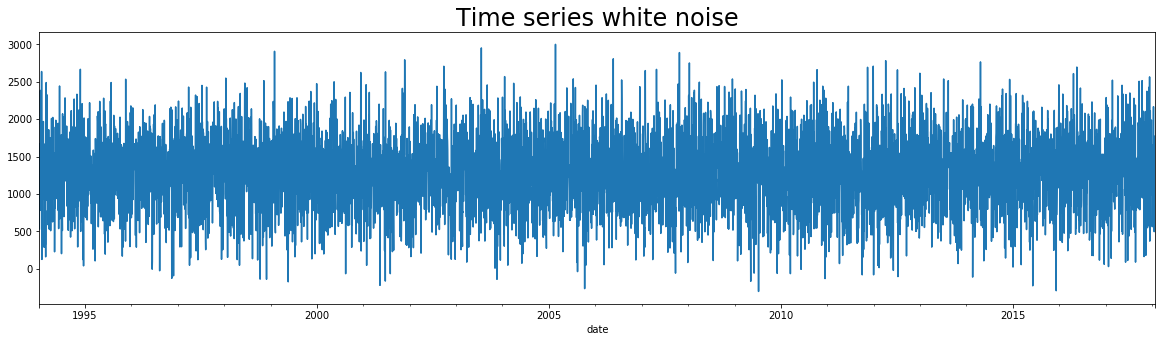

In [32]:
df.white_noise.plot(figsize=(20,5))
plt.title('Time series white noise', size=24)
#we see there is no clear pattern in white noise

Text(0.5, 1.0, 'S&P Prices')

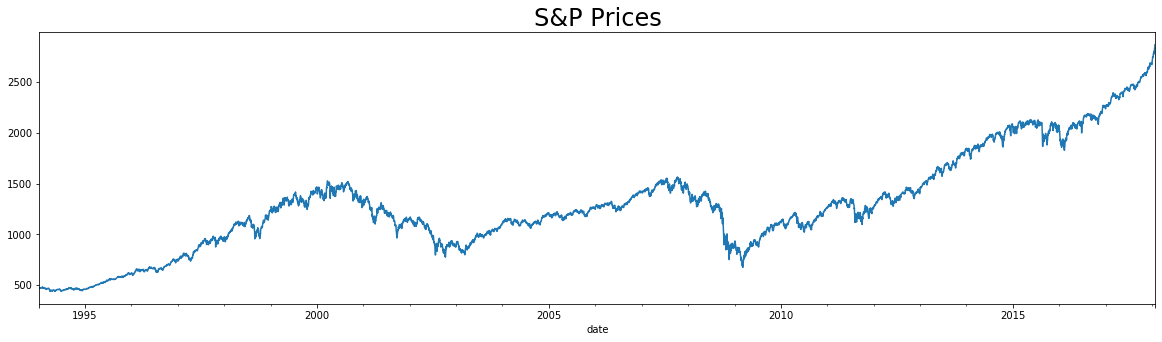

In [33]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size=24)

### Random walk

In [34]:
rw =pd.read_csv('Music/RandWalk.csv')
rw.date =pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw=rw.asfreq('b')
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [35]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [36]:
df['random_walk']=rw.price
df.head()

,market_value,white_noise,random_walk
date,,,
1994-01-07,469.90,533.409438,1122.139662
1994-01-10,475.27,1668.790559,1080.347860
1994-01-11,474.13,1072.650511,1082.095245
1994-01-12,474.17,1411.601542,1083.639265
1994-01-13,472.47,782.166781,1067.146255


Text(0.5, 1.0, 'Random Walk')

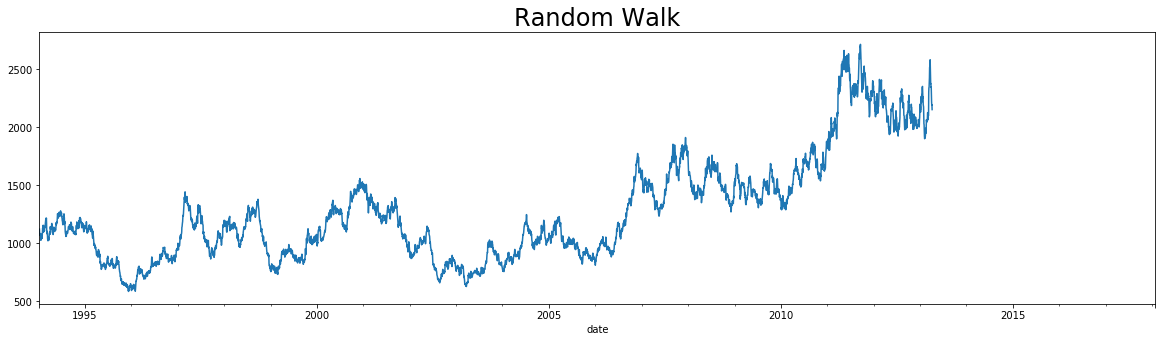

In [37]:
df.random_walk.plot(figsize=(20,5))
plt.title('Random Walk', size=24)

Text(0.5, 1.0, 'Random Walk VS S&P Price')

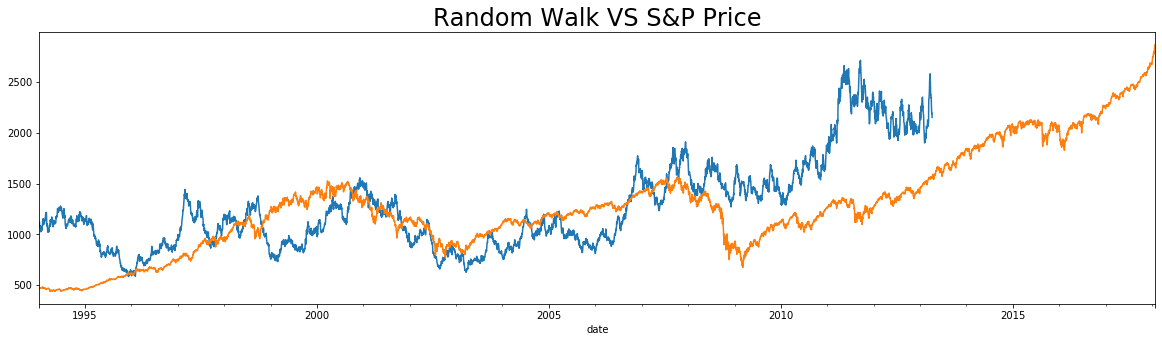

In [38]:
df.random_walk.plot(figsize=(20,5))
df.market_value.plot(figsize=(20,5))
plt.title('Random Walk VS S&P Price', size=24)

### [Stationarity](https://www.youtube.com/watch?v=oY-j2Wof51c)

In [39]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
sts.adfuller(df.market_value)

(1.1194986381728407,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.20986775002)

In [40]:
sts.adfuller(df.white_noise)

(-54.77886557550567,
 0.0,
 1,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 95047.84675217883)

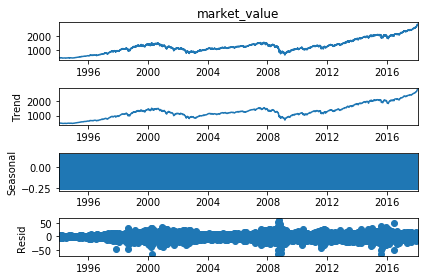

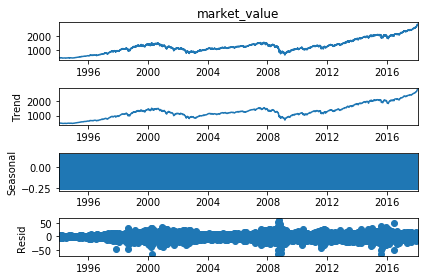

In [41]:
s_dec_additive=seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()

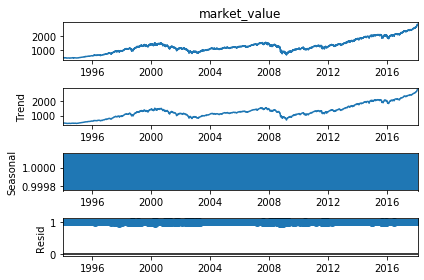

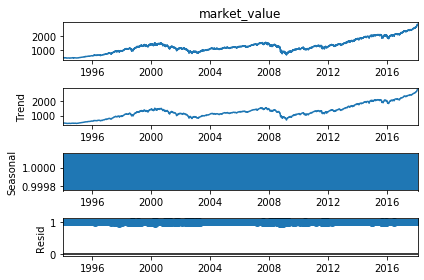

In [42]:
s_dec_multiplicative=seasonal_decompose(df.market_value, 
                        model='multiplicative')
s_dec_multiplicative.plot()

### [Autocorrelation Function](https://www.youtube.com/watch?v=DeORzP0go5I&t=5s)

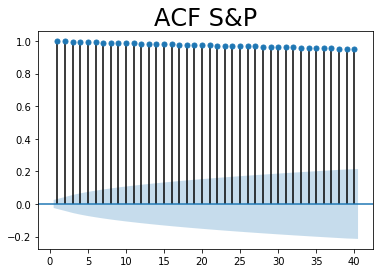

In [43]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

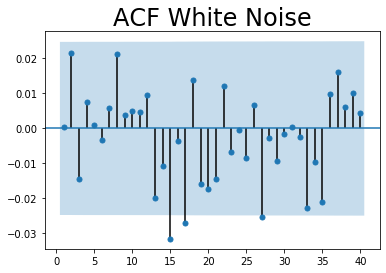

In [44]:
sgt.plot_acf(df.white_noise, lags = 40, zero = False)
plt.title("ACF White Noise", size = 24)
plt.show()

### Partial autocorrelation function

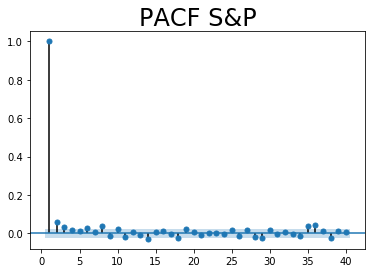

In [45]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

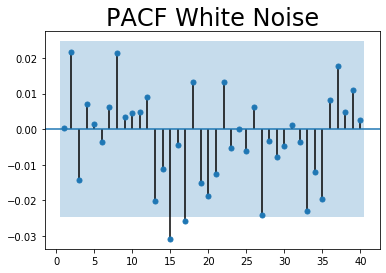

In [46]:
sgt.plot_pacf(df.white_noise, lags = 40, zero = False, method = ('ols'))
plt.title("PACF White Noise", size = 24)
plt.show()

###  [Autoregressive Model](https://www.youtube.com/watch?v=5-2C4eO4cPQ&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=5)

###  [Moving Average Model](https://www.youtube.com/watch?v=voryLhxiPzE&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=6)